In [45]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('student_performance_dataset.csv')
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


In [48]:
df.drop(columns='Student_ID',inplace=True)

In [49]:
df.describe()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,708.000000,708.000000,708.000000,708.000000
mean,26.132768,78.107722,77.871469,58.771186
std,8.877727,13.802802,14.402739,6.705877
min,10.000000,50.116970,50.000000,50.000000
25%,19.000000,67.550094,65.000000,52.000000
50%,27.000000,79.363046,79.000000,59.500000
75%,34.000000,89.504232,91.000000,64.000000
max,39.000000,99.967675,100.000000,77.000000


In [50]:
df.duplicated().sum()

np.int64(208)

In [51]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

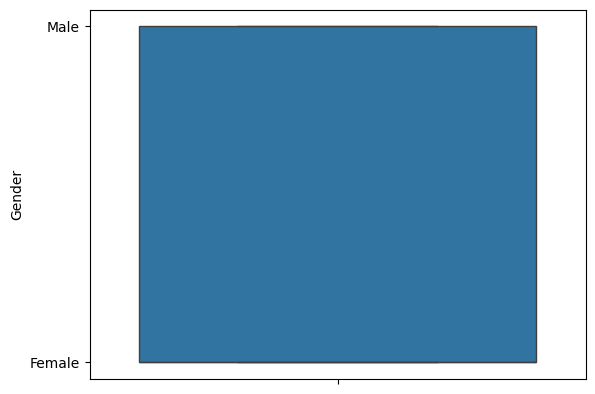

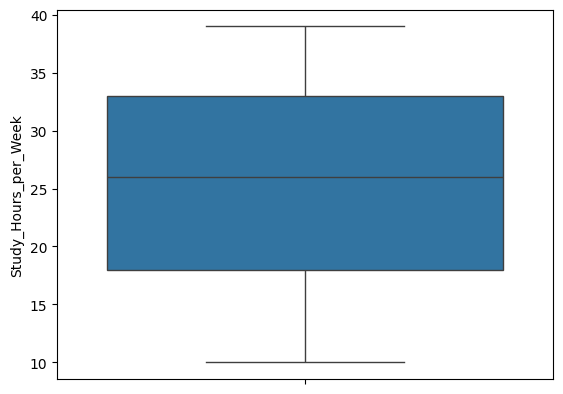

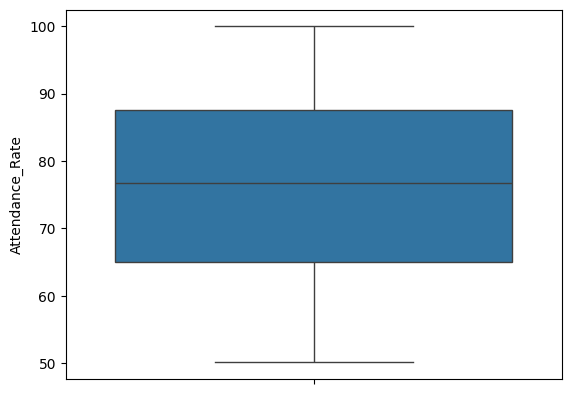

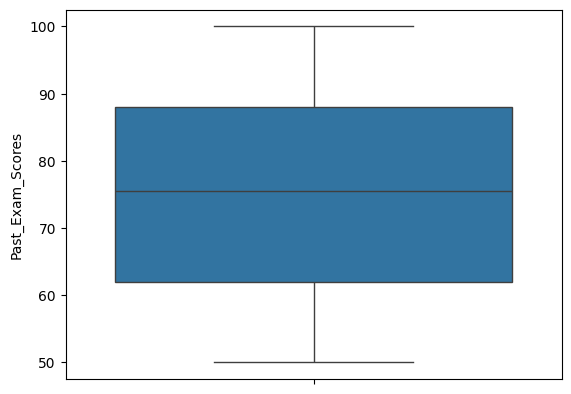

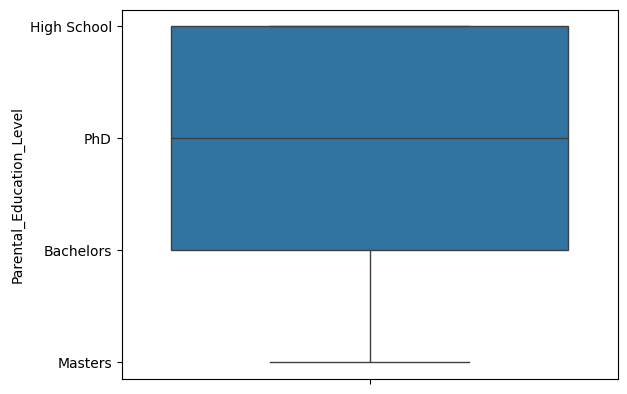

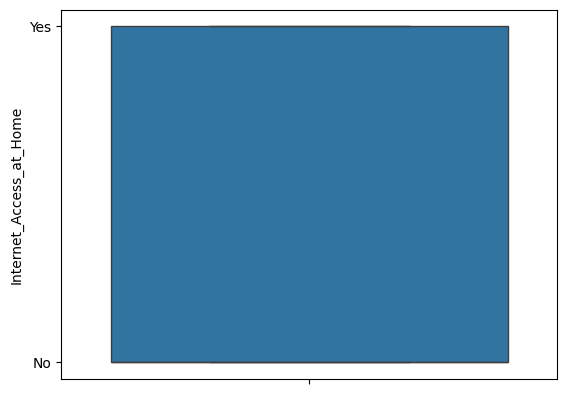

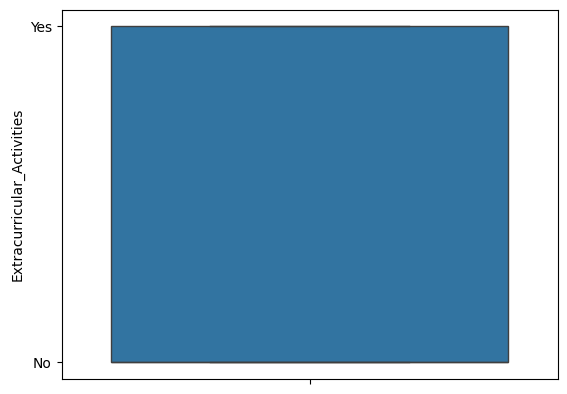

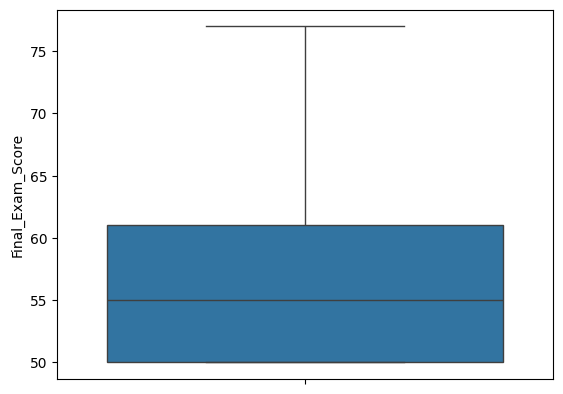

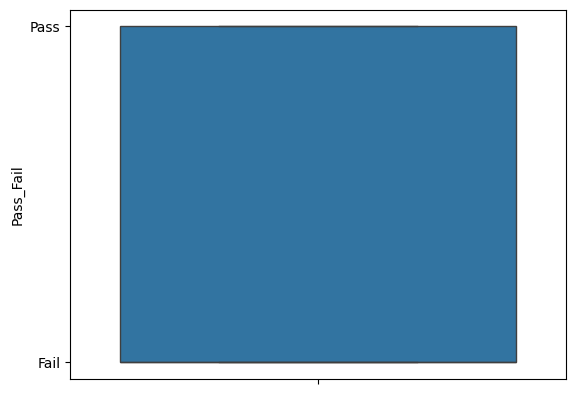

In [52]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 707
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      500 non-null    object 
 1   Study_Hours_per_Week        500 non-null    int64  
 2   Attendance_Rate             500 non-null    float64
 3   Past_Exam_Scores            500 non-null    int64  
 4   Parental_Education_Level    500 non-null    object 
 5   Internet_Access_at_Home     500 non-null    object 
 6   Extracurricular_Activities  500 non-null    object 
 7   Final_Exam_Score            500 non-null    int64  
 8   Pass_Fail                   500 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 39.1+ KB


In [54]:
for i in df.select_dtypes('object'):
    print(df[i].unique())

['Male' 'Female']
['High School' 'PhD' 'Bachelors' 'Masters']
['Yes' 'No']
['Yes' 'No']
['Pass' 'Fail']


In [55]:
mapping = {}
diction = {}
for col in df.select_dtypes('object'):
    unique = df[col].unique()
    mapping = {label : idx for idx,label in enumerate(unique)}
    diction[col] = mapping
    df[col] = df[col].map(mapping)

In [56]:
print(diction)
df.head()

{'Gender': {'Male': 0, 'Female': 1}, 'Parental_Education_Level': {'High School': 0, 'PhD': 1, 'Bachelors': 2, 'Masters': 3}, 'Internet_Access_at_Home': {'Yes': 0, 'No': 1}, 'Extracurricular_Activities': {'Yes': 0, 'No': 1}, 'Pass_Fail': {'Pass': 0, 'Fail': 1}}


,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,0,31,68.267841,86,0,0,0,63,0
1,0,16,78.222927,73,1,1,1,50,1
2,1,21,87.525096,74,1,0,1,55,1
3,1,27,92.076483,99,2,1,1,65,0
4,1,37,98.655517,63,3,1,0,70,0


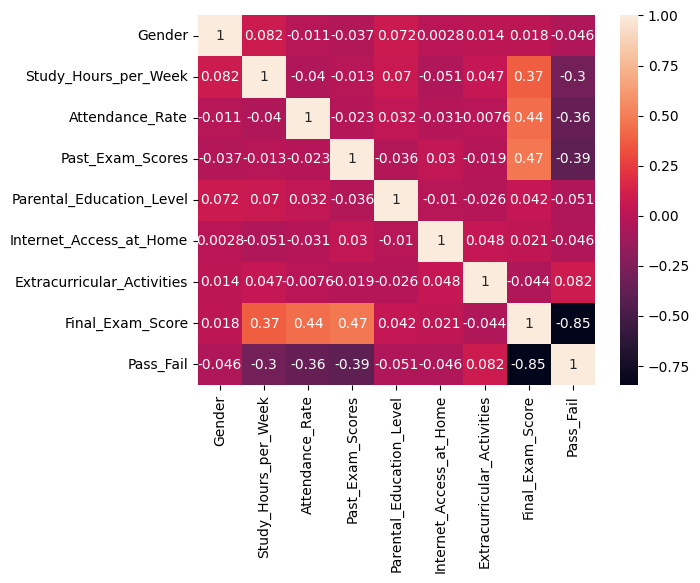

In [57]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [58]:
dff = df.copy(deep=True)

In [59]:
dff.drop(columns=['Internet_Access_at_Home', 'Gender','Parental_Education_Level','Extracurricular_Activities'],inplace=True)

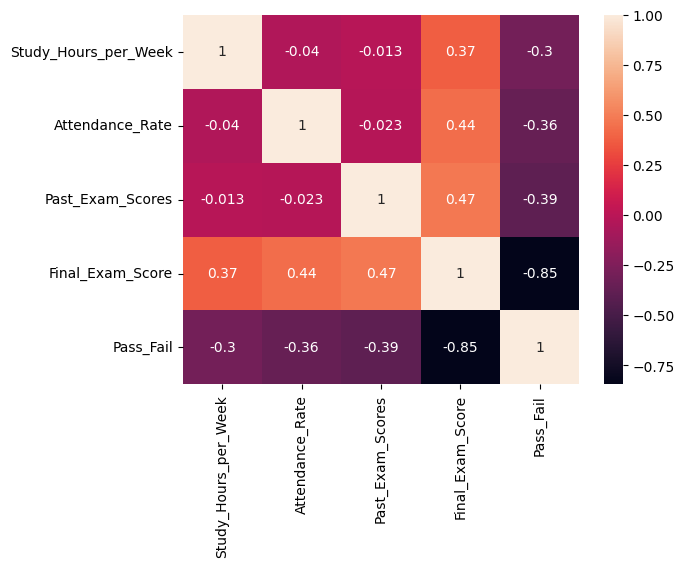

In [60]:
sns.heatmap(dff .corr(),annot=True)
plt.show()

In [61]:
dff['Pass_Fail'].value_counts()

Pass_Fail
1    354
0    146
Name: count, dtype: int64

In [62]:
x = dff.drop(columns='Pass_Fail')
y = dff['Pass_Fail']

In [63]:
def strat(x,y,train_size=0.8):
    yidx= {}
    for i,label in enumerate(y):
        if label not in yidx:
            yidx[label] = [i]
        else:
            yidx[label].append(i)
    
    tr_idx = []
    te_idx = []
    
    for i,label in yidx.items():
        idx = np.random.permutation(label)
        train = max(1,int(len(idx) * train_size))
        tr_idx.extend(idx[:train])
        te_idx.extend(idx[train:])
        
    xtr = x.iloc[tr_idx].reset_index(drop=True)
    xte = x.iloc[te_idx].reset_index(drop=True)
    ytr = y.iloc[tr_idx].reset_index(drop=True)
    yte = y.iloc[te_idx].reset_index(drop=True)
    
    return xtr,xte,ytr,yte

In [64]:
xtr,xte,ytr,yte = strat(x,y)

In [65]:
print(xtr.shape)
print(xte.shape)
print(ytr.shape)
print(yte.shape)

(399, 4)
(101, 4)
(399,)
(101,)


In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
smote = SMOTE(random_state=42)

xtre, ytre = smote.fit_resample(xtr,ytr)

In [68]:
minim = xtre.min()
maxim = xtre.max()
range = (maxim - minim)
xtrs = (xtre - minim) / range
xtes = (xte - minim) / range

In [69]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

In [70]:
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # Multi-class classification
    num_class=len(np.unique(y)),  # Number of classes
    eval_metric='mlogloss',  # Log loss for multi-class classification
    use_label_encoder=False
)

xgb_model.fit(xtrs, ytre)

# Make Predictions
ypred = xgb_model.predict(xtes)

# Evaluate Model
print("Accuracy:", accuracy_score(yte, ypred))
print(classification_report(yte, ypred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        71

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



c:\Users\korez\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:30:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
